## Pepper as a Dance Instructor: Exploring HRI in Dance Education

### Authors:
* Janne Rotter
* Evgeniia Rumiantseva
* Aimee Lin

### Purpose:
This jupyter notebook conducts a "fake" data analysis (fake in the sense that the data is randomly generated and not emiricly gathered). Its purpose is to illustrate how data analysis in its simplest form would look like. Additionally we also only generate data for one UX assesments (so not after each session but only after the last one).

In [100]:
#Imports
import numpy as np
import pandas as pd
from scipy.stats import shapiro
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42042)

## Data Generation

Data is generated for modified UEQ (subjective) as well as dance performance (objective)

### Modified UEQ:

In [101]:
# Parameters
n_participants = 30
conditions = ['Human Teacher', 'Robot Adaptive', 'Robot Non-Adaptive']
genders = ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Other']
age_range = (10, 15)

# UEX scoring parameters
uex_items = 26
dance_ux_items = 10

# Mean and std dev for each condition
condition_params = {
    'Human Teacher': {'mean': 5.8, 'std': 2.7},
    'Robot Adaptive': {'mean': 5.1, 'std': 2.9},
    'Robot Non-Adaptive': {'mean': 3.2, 'std': 2.7},
}

# Generate data
data = []

for condition in conditions:
    for _ in range(n_participants):
        gender = np.random.choice(genders)
        age = np.random.randint(age_range[0], age_range[1] + 1)
        
        # General UEX scores
        uex_scores = np.random.normal(loc=condition_params[condition]['mean'],
                                      scale=condition_params[condition]['std'],
                                      size=uex_items)
        uex_scores = np.clip(np.round(uex_scores), 1, 7)
        
        # Dance-specific UX scores
        dance_scores = np.random.normal(loc=condition_params[condition]['mean'],
                                        scale=condition_params[condition]['std'],
                                        size=dance_ux_items)
        dance_scores = np.clip(np.round(dance_scores), 1, 7)
        
        # Combine into a single row
        row = {
            'Gender': gender,
            'Age': age,
            'Condition': condition
        }
        
        # Add UEX items
        for i, score in enumerate(uex_scores, 1):
            row[f'UEX_{i}'] = int(score)
        
        # Add Dance-specific items
        for i, score in enumerate(dance_scores, 1):
            row[f'DanceUX_{i}'] = int(score)
        
        data.append(row)

# Convert to DataFrame
mueqdf = pd.DataFrame(data)

#Add total score for UEX and DanceUX as well as both combined
mueqdf['UEX_total'] = mueqdf[[f'UEX_{i}' for i in range(1, 27)]].sum(axis=1)

mueqdf['DanceUX_total'] = mueqdf[[f'DanceUX_{i}' for i in range(1, 11)]].sum(axis=1)

mueqdf['UEX_combined'] = mueqdf['UEX_total'] + mueqdf['DanceUX_total']

mueqdf.head()

,Gender,Age,Condition,UEX_1,UEX_2,UEX_3,UEX_4,UEX_5,UEX_6,UEX_7,...,DanceUX_4,DanceUX_5,DanceUX_6,DanceUX_7,DanceUX_8,DanceUX_9,DanceUX_10,UEX_total,DanceUX_total,UEX_combined
0,Female,11,Human Teacher,3,4,5,2,7,4,7,...,2,5,7,7,7,7,6,142,54,196
1,Male,13,Human Teacher,4,4,7,1,5,7,4,...,6,7,4,7,7,3,6,142,60,202
2,Female,12,Human Teacher,4,5,6,7,4,3,7,...,7,4,7,6,7,5,3,141,57,198
3,Male,12,Human Teacher,6,7,7,3,5,7,1,...,5,2,3,7,5,1,7,134,48,182
4,Male,13,Human Teacher,7,5,7,7,4,7,3,...,5,7,7,3,7,7,7,142,54,196


### Dance Performance: 

In [102]:
# Improvement ranges by condition
improvement_params = {
    'Human Teacher': {'pre_mean': 20, 'gain_mean': 50, 'gain_std': 10},
    'Robot Adaptive': {'pre_mean': 20, 'gain_mean': 45, 'gain_std': 9},
    'Robot Non-Adaptive': {'pre_mean': 20, 'gain_mean': 30, 'gain_std': 15},
}

# Generate pre-post test data
pre_post_data = []

for idx, row in mueqdf.iterrows():
    condition = row['Condition']
    params = improvement_params[condition]

    # Sample pretest around a mean of 60
    pre_score = np.clip(np.random.normal(loc=params['pre_mean'], scale=10), 0, 100)

    # Sample gain based on condition
    gain = np.random.normal(loc=params['gain_mean'], scale=params['gain_std'])
    post_score = pre_score + gain
    post_score = np.clip(post_score, pre_score + 1, 100)  # Ensure post > pre

    pre_post_data.append({
        'Participant_ID': idx,
        'Condition': condition,
        'PreTest': round(pre_score, 1),
        'PostTest': round(post_score, 1),
        'Improvement': round(post_score - pre_score, 1)
    })

# Create new DataFrame
pre_post_df = pd.DataFrame(pre_post_data)

combined_df = pd.concat([mueqdf, pre_post_df[['PreTest', 'PostTest', 'Improvement']]], axis=1)

combined_df.head()


,Gender,Age,Condition,UEX_1,UEX_2,UEX_3,UEX_4,UEX_5,UEX_6,UEX_7,...,DanceUX_7,DanceUX_8,DanceUX_9,DanceUX_10,UEX_total,DanceUX_total,UEX_combined,PreTest,PostTest,Improvement
0,Female,11,Human Teacher,3,4,5,2,7,4,7,...,7,7,7,6,142,54,196,18.4,66.8,48.4
1,Male,13,Human Teacher,4,4,7,1,5,7,4,...,7,7,3,6,142,60,202,24.7,94.0,69.2
2,Female,12,Human Teacher,4,5,6,7,4,3,7,...,6,7,5,3,141,57,198,25.2,80.3,55.1
3,Male,12,Human Teacher,6,7,7,3,5,7,1,...,7,5,1,7,134,48,182,14.1,76.4,62.3
4,Male,13,Human Teacher,7,5,7,7,4,7,3,...,3,7,7,7,142,54,196,24.6,59.4,34.9


### Demographic Analysis 

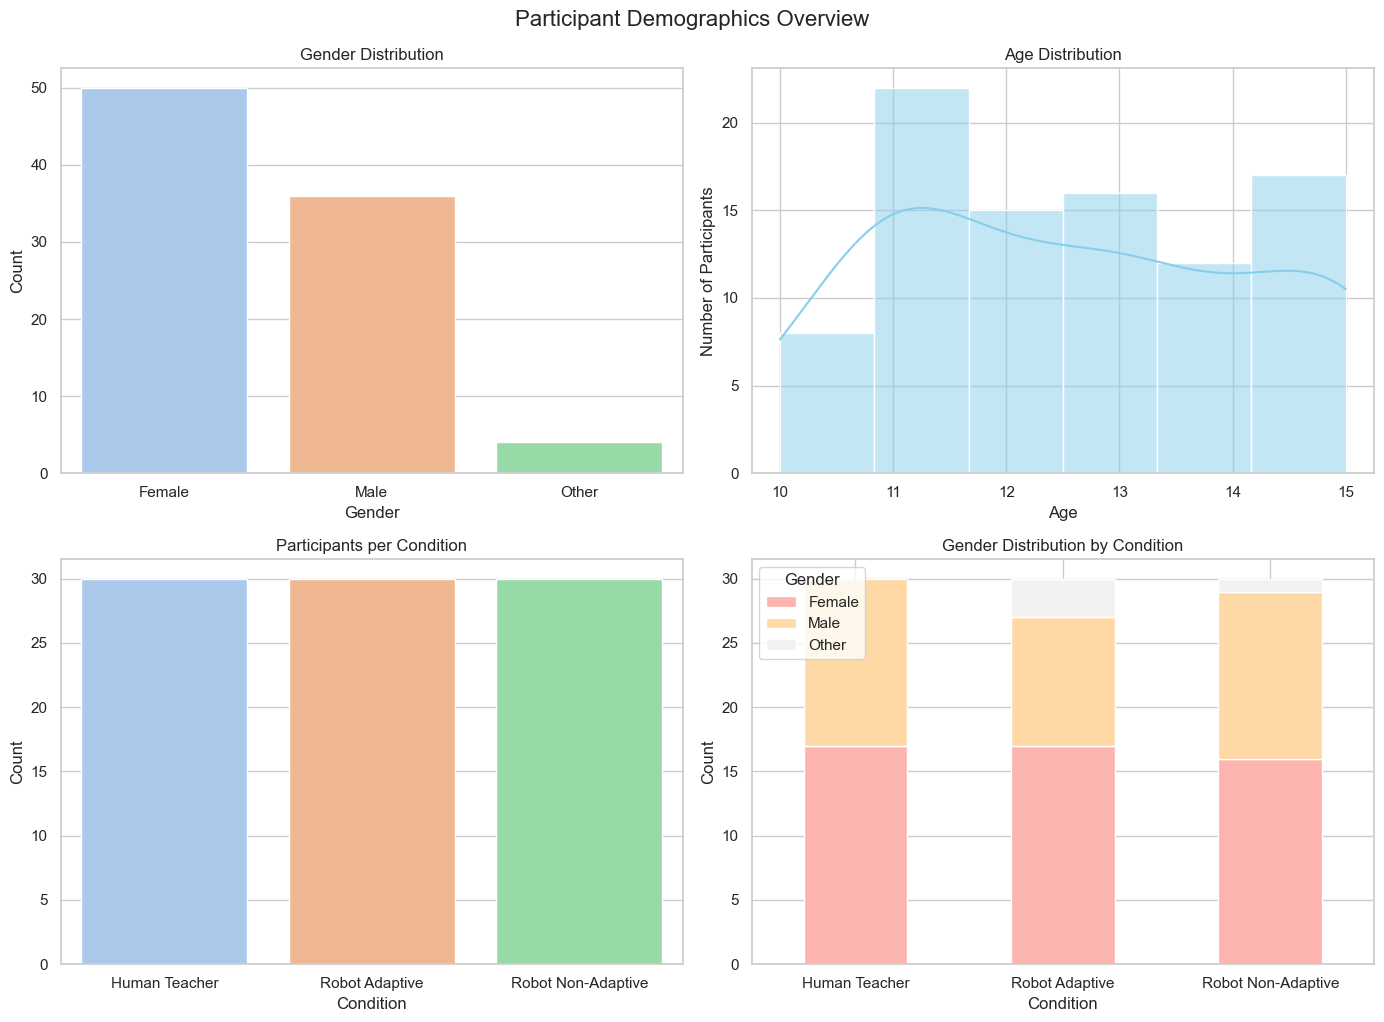

In [122]:
# Set plotting style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# --- 1. Gender Distribution ---
plt.subplot(2, 2, 1)
sns.countplot(data=combined_df, x='Gender', hue='Gender', palette='pastel', legend=False)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# --- 2. Age Distribution ---
plt.subplot(2, 2, 2)
sns.histplot(data=combined_df, x='Age', bins=6, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of Participants')

# --- 3. Condition Distribution ---
plt.subplot(2, 2, 3)
sns.countplot(data=combined_df, x='Condition', hue='Condition', palette='pastel', legend=False)
plt.title('Participants per Condition')
plt.xlabel('Condition')
plt.ylabel('Count')

# --- 4. Gender by Condition (stacked bar) ---
plt.subplot(2, 2, 4)
gender_condition_ct = pd.crosstab(combined_df['Condition'], combined_df['Gender'])
gender_condition_ct.plot(kind='bar', stacked=True, colormap='Pastel1', ax=plt.gca())
plt.title('Gender Distribution by Condition')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.legend(title='Gender')
plt.xticks(rotation=0)

plt.tight_layout()
plt.suptitle('Participant Demographics Overview', fontsize=16, y=1.02)
plt.show()


### Check wheter the distributions are parametric

In [104]:
# Shapiro-Wilk Test
shapiro_ux = shapiro(combined_df['UEX_combined'])
shapiro_improv = shapiro(combined_df['Improvement'])

print("Shapiro-Wilk for UEX_combined:", shapiro_ux)
print("Shapiro-Wilk for Improvement:", shapiro_improv)

Shapiro-Wilk for UEX_combined: ShapiroResult(statistic=0.9498592024034059, pvalue=0.0016405154357007)
Shapiro-Wilk for Improvement: ShapiroResult(statistic=0.9875173191686148, pvalue=0.5504019555275484)


Since p-values for UEX are below $\alpha$ = 0.05 we can assume normality. However for the objective dance improvement we cannot assume normality

### Statistical evaluation of hypotheses

First for $H_{03}$ and $H_{04}$ as the UEX scores are parametric:

H03: One sided t-test between Human Teacher and Robot Adaptive: t = 7.505, p = 2.0769159002842938e-10

H04: One sided t-test between Robot Adaptive and Robot Non-Adaptive: t = 14.028, p = 1.3530888597101966e-20


<Axes: title={'center': 'Visualization of UX in different groups with error bars'}, xlabel='Condition', ylabel='UEX_combined'>

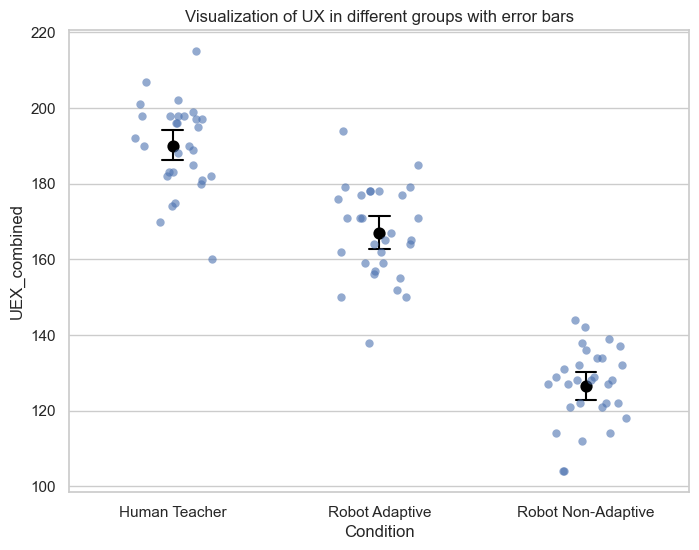

In [113]:
# Subset relevant data
group1 = combined_df[combined_df['Condition'] == 'Human Teacher']['UEX_combined']
group2 = combined_df[combined_df['Condition'] == 'Robot Adaptive']['UEX_combined']
group3 = combined_df[combined_df['Condition'] == 'Robot Non-Adaptive']['UEX_combined']

# H03: Human Teacher > Robot Adaptive
t_stat_1, p_1 = stats.ttest_ind(group1, group2, alternative='greater')
print(f"H03: One sided t-test between Human Teacher and Robot Adaptive: t = {t_stat_1:.3f}, p = {p_1}")

# H04: Robot Adaptive > Robot Non-Adaptive
t_stat_2, p_2 = stats.ttest_ind(group2, group3, alternative='greater')
print(f"\nH04: One sided t-test between Robot Adaptive and Robot Non-Adaptive: t = {t_stat_2:.3f}, p = {p_2}")

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

plt.title('Visualization of UX in different groups with error bars')

# Boxplot with scatter and mean error bars
sns.pointplot(data=combined_df, x='Condition', y='UEX_combined',
              estimator='mean', errorbar=('ci', 95), capsize=0.1, color='black', err_kws={'linewidth': 1.5}, linestyles="None")

# Add individual data points (jittered for visibility)
sns.stripplot(data=combined_df, x='Condition', y='UEX_combined',
              jitter=0.2, size=6, alpha=0.6)

Both p-values are below $\alpha=0.05$ so we can reject $H_{03}$ and $H_{04}$

Now for the analysis of the objective dance performance. As it is not parametricly distributed we use the Mann-Whitney U Test

H01: Mann-Whitney U Test between Human Teacher and Robot Adaptive: U = 593.500, p = 0.0345

H01: Mann-Whitney U Test between Robot Adaptive and Robot Non-Adaptive: U = 221.000, p = 0.0007


<Axes: title={'center': 'Visualization of pre-post dance performance in different groups with error bars'}, xlabel='Condition', ylabel='Improvement'>

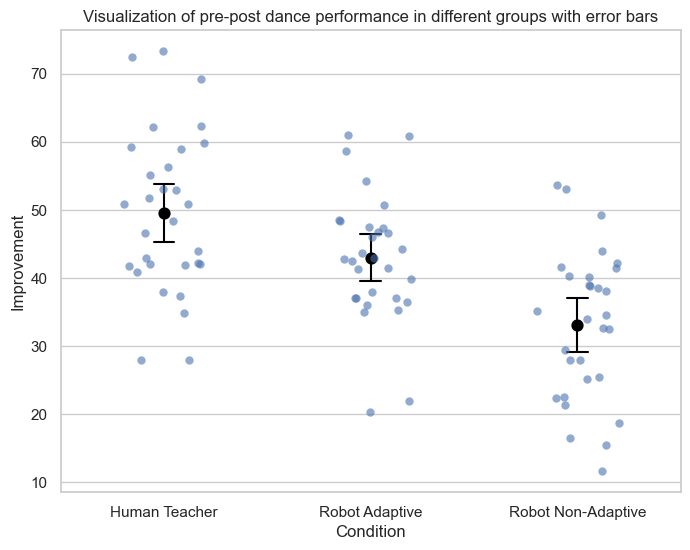

In [118]:
human_teacher_improvement = combined_df[combined_df['Condition'] == 'Human Teacher']['Improvement']
robot_adaptive_improvement = combined_df[combined_df['Condition'] == 'Robot Adaptive']['Improvement']
robot_non_adaptive_improvement = combined_df[combined_df['Condition'] == 'Robot Non-Adaptive']['Improvement']

u_stat_h01, p_value_h01 = stats.mannwhitneyu(human_teacher_improvement, robot_adaptive_improvement, alternative='two-sided')
print(f"H01: Mann-Whitney U Test between Human Teacher and Robot Adaptive: U = {u_stat_h01:.3f}, p = {p_value_h01:.4f}")

u_stat_h02, p_value_h02 = stats.mannwhitneyu(robot_non_adaptive_improvement, robot_adaptive_improvement, alternative='two-sided')
print(f"\nH01: Mann-Whitney U Test between Robot Adaptive and Robot Non-Adaptive: U = {u_stat_h02:.3f}, p = {p_value_h02:.4f}")

# Set style
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

plt.title('Visualization of pre-post dance performance in different groups with error bars')

# Boxplot with scatter and mean error bars
sns.pointplot(data=combined_df, x='Condition', y='Improvement',
              estimator='mean', errorbar=('ci', 95), capsize=0.1, color='black', err_kws={'linewidth': 1.5}, linestyles="None")

# Add individual data points (jittered for visibility)
sns.stripplot(data=combined_df, x='Condition', y='Improvement',
              jitter=0.2, size=6, alpha=0.6)

Both p-values are below $\alpha=0.05$ so we can also reject $H_{01}$ and $H_{02}$

## Summary:
We can reject every Nullhypothesis. If these were real world data it would lead us to belief that pepper does not yet perform on the same level as a human teacher regarding UX and obejctive dance perfromance. However it would suggest that robot adaptability plays a crucial role in both.